In [1]:
import numpy as np
import pandas as pd

import math as m

import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600))) 

from matplotlib import pyplot as plt

import plotly.express as px
px.defaults.width, px.defaults.height = 1000, 600

In [2]:
def gen_A(a, b, n):
    
    """
    Takes three inputs 
    n: Number of intervals on X-axis created by interior mesh points -> Hence n-1 mesh points.
    a: Lower boundary for x.
    b: Upper boundary for x.
    
    Returns a tridiagonal matrix A of shape (n+1)*(n+1).
    
    """
    # Compute P, Q
    
    P = np.full((n+1), 3)
    Q = np.full((n+1), 2)
    
    # Initialise a (n+1)*(n+1) matrix of zeros
    
    A = np.zeros((n+1,n+1))
    
    # Derive delta_x
    delta_x = (b-a)/n
    
    # Compute matrix values 
    
    for i in range(n+1):
        if i==0:
            A[i,i] = 1
        elif i==n:
            A[i,i] = 1
        else:
            A[i,i-1] = 1-delta_x/2*P[i]
            A[i,i] = -2+delta_x**2*Q[i]
            A[i,i+1] = 1+delta_x/2*P[i]
    
    return A
        

In [3]:
# Create vector x_i

def gen_x_i(a, b, n):
    
    # Initialise
    x_i = np.zeros(n+1)
    
    # Derive delta_x
    delta_x = (b-a)/n
    
    # Update values
    for i in range(n+1):
        x_i[i] = a+i*delta_x
    return x_i

In [4]:
# Create Matrix b - knowing f(x) = 4*x**2

def gen_b(a, b, alpha, beta, n, x_i): 
    
    # Initialise
    _B = np.zeros(n+1)
    
    # Derive delta_x
    delta_x = (b-a)/n
    
    # Update values
    for i in range(n+1):
        if i == 0:
            _B[i] = alpha
        elif i == n:
            _B[i] = beta
        else:
            _B[i] = delta_x**2*4*x_i[i]**2
    return _B
        

In [5]:
# Create function to calculate the _X Matrix in the "Ax=b" problem
# (_X is Capitalised to distinguish from x values vector)

def calc_y(a, b, alpha, beta, n):
    
    A = gen_A(a, b, n)
    x_i = gen_x_i(a, b, n)
    _B = gen_b(a, b, alpha, beta, n, x_i)
    
    _X = np.dot(np.linalg.inv(A), _B)
    
    return _X, x_i

In [6]:
# Calculate the _X Matrix (Capitalised to distinguish from x_i values vector) at n=10, 50, 100
_X_10 = calc_y(1,2,1,6,10)
_X_50 = calc_y(1,2,1,6,50)
_X_100 = calc_y(1,2,1,6,100)

# Store results in dataframes for plotting
results_10 = pd.DataFrame.from_dict({'y': _X_10[0].flatten(),'x': _X_10[1].flatten()})
results_50 = pd.DataFrame.from_dict({'y': _X_50[0].flatten(),'x': _X_50[1].flatten()})
results_100 = pd.DataFrame.from_dict({'y': _X_100[0].flatten(),'x': _X_100[1].flatten()})

In [7]:
# Plot x's and y's when n=10

fig = px.scatter(
    results_10, x='x', y='y', 
    labels={'x': 'Values of interior mesh points', 'y': 'Approximated y using FDM'},
    title="Numerically Approximated y values at n=10"
     ).update_traces(mode='markers', marker=dict(symbol='cross', color='blue'))
fig.show()

In [8]:
# Plot x's and y's when n=50

fig = px.scatter(
    results_50, x='x', y='y', 
    labels={'x': 'Values of interior mesh points', 'y': 'Approximated y using FDM'},
    title="Numerically Approximated y values at n=50"
     ).update_traces(mode='markers', marker=dict(symbol='cross', color='blue'))
fig.show()

In [9]:
# Plot x's and y's when n=100

fig = px.scatter(
    results_100, x='x', y='y', 
    labels={'x': 'Values of interior mesh points', 'y': 'Approximated y using FDM'},
    title="Numerically Approximated y values at n=100"
     ).update_traces(mode='markers', marker=dict(symbol='cross', color='blue'))
fig.show()

In [10]:
# Defining Function y

def precise_y(x):
    return (-3*m.exp(3-x)-2*m.exp(1-x)+2*m.exp(3-2*x)+3*m.exp(4-2*x))/(1-m.exp(1))+2*x**2-6*x+7

In [11]:
# Generate 500 x values in domain [1,2]

x = list(np.linspace(1, 2, num=500))
y = [precise_y(x) for x in x]

# Store values of x and y into a dataframe 

results_actual = pd.DataFrame.from_dict({'x': x,'y': y})
results_actual

,x,y
0,1.000000,1.000000
1,1.002004,1.032101
2,1.004008,1.064018
3,1.006012,1.095751
4,1.008016,1.127301
...,...,...
495,1.991984,5.990602
496,1.993988,5.992949
497,1.995992,5.995298
498,1.997996,5.997648


In [12]:
# Plot x's and actual y's 

fig = px.scatter(
    results_actual, x='x', y='y', 
    labels={'x': 'Values of interior mesh points', 'y': 'Actual values of y'},
    title="Actual values of y"
     ).update_traces(mode='markers', marker=dict(symbol='cross', color='green'))
fig.show()

In [13]:
# Calculating errors of approximated solutions

# Calculating actual values of y 
actual_y_10 = [precise_y(x) for x in list(_X_10[1])]
actual_y_50 = [precise_y(x) for x in list(_X_50[1])]
actual_y_100 = [precise_y(x) for x in list(_X_100[1])]

# Appending actual values of y to each result dataset for n=10, 50, 100
results_10['Actual y'] = actual_y_10
results_50['Actual y'] = actual_y_50
results_100['Actual y'] = actual_y_100

# Calculating an error column that stores the error of the numerically approximated y to the actual y
results_10['n=10 Error'] = results_10['Actual y'] - results_10['y']
results_50['n=50 Error'] = results_50['Actual y'] - results_50['y']
results_100['n=100 Error'] = results_100['Actual y'] - results_100['y']


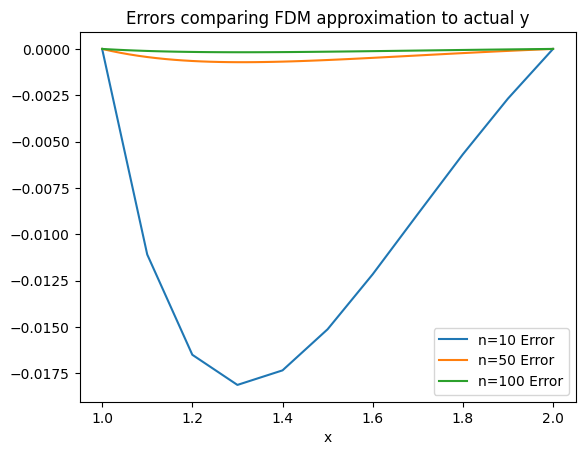

In [14]:
# Plotting errors onto the same graph

ax = results_10.plot(x='x',y='n=10 Error');
results_50.plot(ax=ax, x='x', y='n=50 Error');
results_100.plot(ax=ax, x='x', y='n=100 Error');
ax.set_title("Errors comparing FDM approximation to actual y");

In [15]:
# Writing the process above into a function that takes n as an input,
# and output a tuple with two elements:
# (a) 4-column dataframe storing x, numerical solution y, actual solution y, and Error
# (b) value of n

def get_results(n):
    _X = calc_y(1,2,1,6,n)
    actual_y = [precise_y(x) for x in list(_X[1])]
    
    results = pd.DataFrame.from_dict({
        'y': _X[0].flatten(),
        'x': _X[1].flatten(),
        'Actual y': actual_y
    })
    
    results[f'n={n} Error'] = results['Actual y'] - results['y']
    
    return results, n

In [16]:
# Define a list of n values

N = [int(n) for n in list(np.linspace(50, 1000, 20))]

# Calculating a list of results ()

results_list = [get_results(n) for n in N]

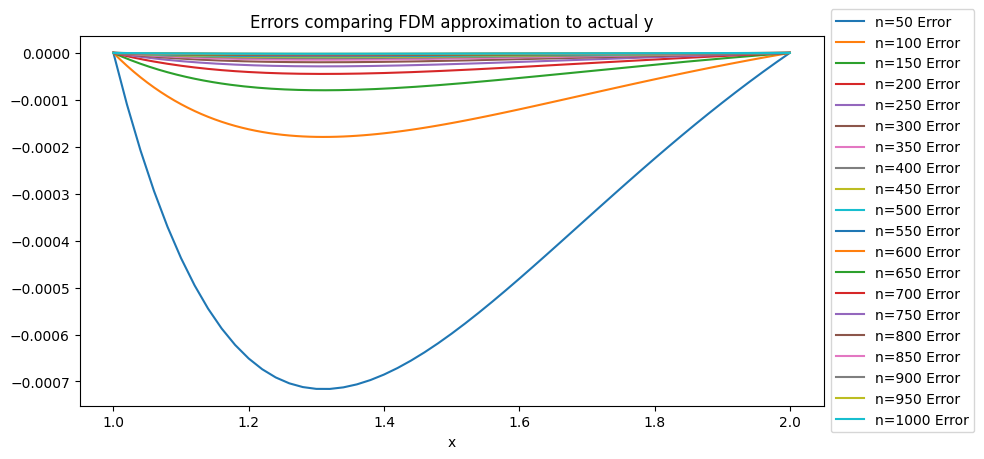

In [17]:
# Plot errors at various n's in one graph

# Create axis with results at n=50 (first value of n)
ax = results_list[0][0].plot(x='x',y=f'n={results_list[0][1]} Error')

# Loop through results for all n's
for i in range(1, len(results_list)):
    results_list[i][0].plot(ax=ax, x='x', y=f'n={results_list[i][1]} Error')
    ax.set_title("Errors comparing FDM approximation to actual y")

# Graph specifications
ax.set_title("Errors comparing FDM approximation to actual y");
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.5, box.height]);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

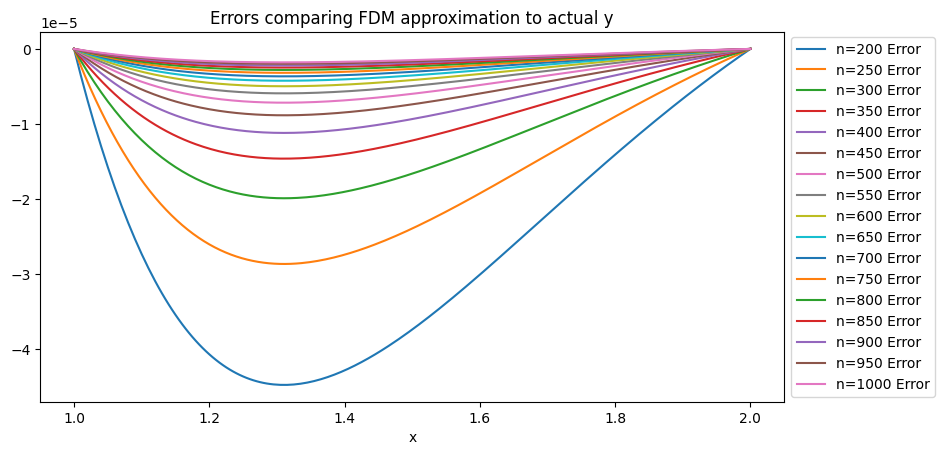

In [18]:
# Zooming-in to look closer at the error lines with larger n values
results_trimmed = results_list[3:]

# Create axis with results at n=50
ax = results_trimmed[0][0].plot(x='x',y=f'n={results_trimmed[0][1]} Error')

# Loop through results for all n's
for i in range(1, len(results_trimmed)):
    results_trimmed[i][0].plot(ax=ax, x='x', y=f'n={results_trimmed[i][1]} Error')
    ax.set_title("Errors comparing FDM approximation to actual y")

# Graph specifications
ax.set_title("Errors comparing FDM approximation to actual y");
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.5, box.height]);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [19]:
# Calculating mean squared error
MSE = []
for i in range(len(results_list)):
    df = results_list[i][0]
    error_list = list(df[df.columns[len(df.columns)-1]])
    MSE.append(sum([error**2 for error in error_list])/results_list[i][1])

# Storing MSE and their respective n into a dataframe for visualisation
MSE_df = pd.DataFrame.from_dict({
        'n': N,
        'MSE': MSE
    })

# Plotting MSE as n increases
fig = px.scatter(
    MSE_df, x='n', y='MSE',
    width=800, height=600,
    title="MSE between numerical solution and actual solution as n increases"
     ).update_traces(mode='markers', marker=dict(symbol='cross', color='blue'))
fig.show()

In [20]:
# Removing n=50 to zoom in
fig = px.scatter(
    MSE_df.loc[MSE_df['n']>150], x='n', y='MSE',
    width=800, height=600,
    title="MSE between numerical solution and actual solution as n increases"
     ).update_traces(mode='markers', marker=dict(symbol='cross', color='blue'))
fig.show()

In [21]:
# Listing MSE values
MSE_df[['n','MSE']]

,n,MSE
0,50,2.374570e-07
1,100,1.482977e-08
2,150,2.928923e-09
3,200,9.266842e-10
4,250,3.795611e-10
5,300,1.830420e-10
6,350,9.880087e-11
7,400,5.791482e-11
8,450,3.615613e-11
9,500,2.372173e-11
